In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors


In [2]:
SMALL_SIZE =14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def plot_gemme(to_plot, ylab="GEMME score", ax=None, legend=True, color=None, label=None, legend_box=(1.15, 1.0)):
    if color:
        to_plot.columns = ["Position", "GEMME"]
        ax.bar(data=to_plot, x ="Position", height="GEMME", color=color)
        labels = [label]
        handles = [plt.Rectangle((0,0),1,1, color=[color][i]) for i, label in enumerate(labels)]
    else:
        to_plot.columns = ["Position", "GEMME", "Helix", "color"]
        to_plot["color"] = to_plot["color"].astype('category').cat.codes
        norm = plt.Normalize(to_plot["color"].min(), to_plot["color"].max())
        cmap = plt.get_cmap("Paired")
        ax.bar(data=to_plot, x ="Position", height="GEMME", color=cmap(norm(to_plot.color.values)))
        labels = to_plot.Helix.drop_duplicates()
        handles = [plt.Rectangle((0,0),1,1, color=cmap(norm(to_plot.color.drop_duplicates().values))[i]) for i, label in enumerate(labels)]
    if legend:
        ax.legend(handles, labels, bbox_to_anchor=legend_box)
    sns.despine(ax=ax)
    ax.set_xlabel("Position")
    ax.set_ylabel(ylab)
    return ax

def plot_allo_gemme_corr(to_plot, xann=None, yann=None, ax=None, title=None):
    sns.regplot(data=to_plot, x="x", y="y",  line_kws={"color":"r","alpha":0.7,"lw":2}, ax=ax)
    stats = sp.stats.spearmanr(to_plot["x"].to_list(), to_plot["y"].to_list())
    ax.set_xlabel("GEMME score")
    ax.set_ylabel("Allosteric score")
    ax.annotate(f'r = {np.round(stats[0], 3)}\np_value = {np.format_float_scientific(stats[1], precision=1)}',
                xy=(xann, yann))
    ax.set_title(title)
    sns.despine(ax=ax)
    return ax

# DRD1

In [4]:
drd1_gemme = pd.read_table("data/DRD1/1e-10/normPred_evolCombi.txt", sep=" ").T

all_data_drd1 = pd.read_csv("data/DRD1/hubscores_compiled_latest_DRD1.csv", skiprows=1)
#drd1_gemme = pd.read_table("DRD1/GEMME_evcombi_DRD1.tsv", sep="\t", index_col=0)

drd1_gemme_mean = drd1_gemme.iloc[all_data_drd1.Position.dropna().astype("int") - 1, :].mean(axis=1).to_frame()
all_data_drd1 = all_data_drd1[~all_data_drd1.Position.isna()]

drd1_gemme_mean["GPCR_Ref"] = all_data_drd1["GPCR Ref"].to_list()

drd1_gemme_mean["Helix"] = [str(x).split(".")[0] for x in drd1_gemme_mean.GPCR_Ref.fillna(0.0)]

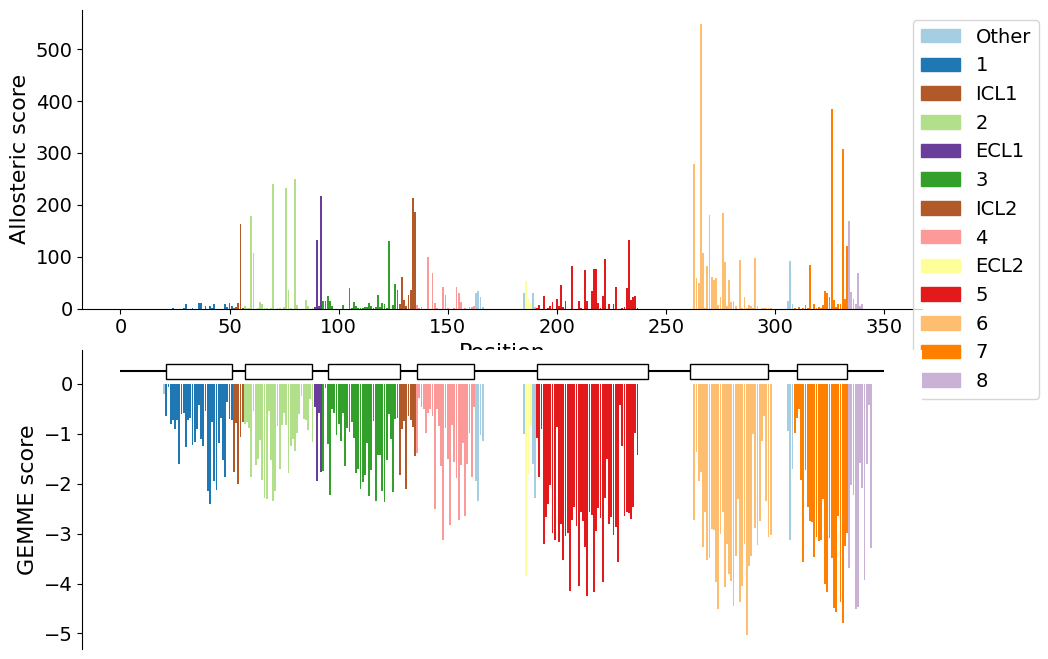

In [5]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([all_data_drd1.Position.dropna().astype("int").to_list(), 
                        all_data_drd1["Gpi score2"].to_list(), 
                        drd1_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", legend=True)

to_plot = pd.DataFrame([all_data_drd1.Position.dropna().astype("int").to_list(), 
                        drd1_gemme_mean.iloc[:, 0].to_list(), 
                        drd1_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
#axes[0].get_xaxis().set_visible(True)
axes[0].tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes[1], legend=False)
axes[1].hlines(xmin=0, xmax=350, y=0.25, color="black", zorder=1)
#TM1
p = plt.Rectangle((21, 0.1), 30, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((57, 0.1), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((95, 0.1), 33, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((136, 0.1), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((191, 0.1), 51, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((261, 0.1), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((310, 0.1), 23, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.14, left=0.2)
fig.savefig("plots/gemme_allo_scores_drd1.png", dpi=720, transparent=True, )

In [6]:
drd1_gemme_mean.sort_values(0).head(10)

,0,GPCR_Ref,Helix
V287,-5.038986,6.50,6
V331,-4.787149,7.53,7
V328,-4.561392,7.50,7
V274,-4.514288,6.37,6
V337,-4.512453,8.50,8
V327,-4.479707,7.49,7
V338,-4.471998,8.51,8
V281,-4.454918,6.44,6
V284,-4.368171,6.47,6
V330,-4.365996,7.52,7


In [7]:
score_df = pd.DataFrame([all_data_drd1["Position"].to_list(), drd1_gemme_mean[0].to_list(), all_data_drd1["Gpi score1"].to_list(), all_data_drd1["GPCR Ref"].to_list()]).T
score_df.columns = ["Position", "GEMME", "Allo", "GPCR Ref"]

In [8]:
score_df[["GEMME", "Allo"]].astype("float").describe(percentiles=[.25, .5, .75])

,GEMME,Allo
count,275.000000,275.000000
mean,-1.945196,12.511165
std,1.158306,22.433226
min,-5.038986,0.000000
25%,-2.760473,0.237004
50%,-1.775441,3.909937
75%,-0.901704,14.154126
max,-0.071152,184.289671


In [9]:
# Bottom gemme, top allo
score_df.loc[(score_df.Allo > 14) & (score_df.GEMME > -1.27), ].to_csv("bottom_gemme_top_allo_drd1.csv", index=False)

# Top gemme, top allo
score_df.loc[(score_df.Allo > 14) & (score_df.GEMME < -2.6),].to_csv("top_gemme_top_allo_drd1.csv", index=False)

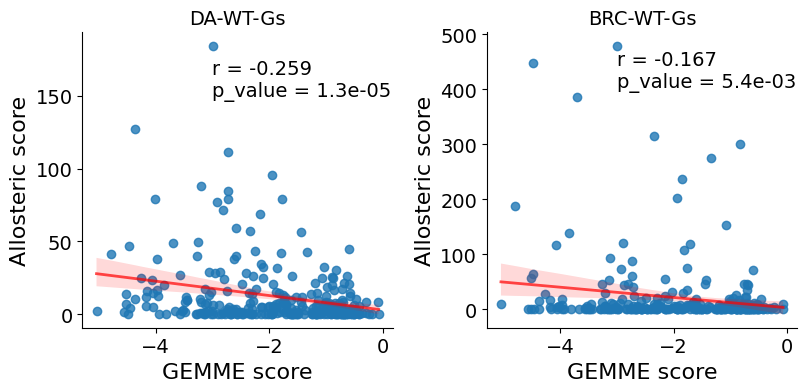

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8.3, 4.15), sharex=True, tight_layout=True)
axes = axes.flatten()

to_plot = pd.DataFrame([drd1_gemme_mean[0].to_list(), all_data_drd1["Gpi score1"].to_list(), ]).T
to_plot.columns = ["x", "y"]
plot_allo_gemme_corr(to_plot, xann=-3, yann=150, ax=axes[0], title="DA-WT-Gs")

to_plot = pd.DataFrame([drd1_gemme_mean[0].to_list(), all_data_drd1["Gpi score5"].to_list(), ]).T
to_plot.columns = ["x", "y"]
axes[1] = plot_allo_gemme_corr(to_plot, xann=-3, yann=405, ax=axes[1], title="BRC-WT-Gs")
fig.savefig("plots/drd1_gemme_allo_corr.png", dpi=720, transparent=True)

# DRD2

In [11]:
drd2_gemme = pd.read_table("data/DRD2/1e-10/normPred_evolCombi.txt", sep=" ").T

all_data_drd2 = pd.read_csv("data/DRD2/hubscores_compiled_latest_DRD2.csv", skiprows=1)
#drd2_gemme = pd.read_table("DRD2/GEMME_evcombi_DRD2.tsv", sep="\t", index_col=0)
 
drd2_gemme_mean = drd2_gemme.iloc[all_data_drd2.Position.dropna().astype("int") - 1, :].mean(axis=1).to_frame()
#drd2_gemme_mean = drd2_gemme.mean(axis=1)
all_data_drd2 = all_data_drd2[~all_data_drd2.Position.isna()]

drd2_gemme_mean["GPCR_Ref"] = all_data_drd2["GPCR Ref"].to_list()

drd2_gemme_mean["Helix"] = [str(x).split(".")[0] for x in drd2_gemme_mean.GPCR_Ref.fillna(0.0)]

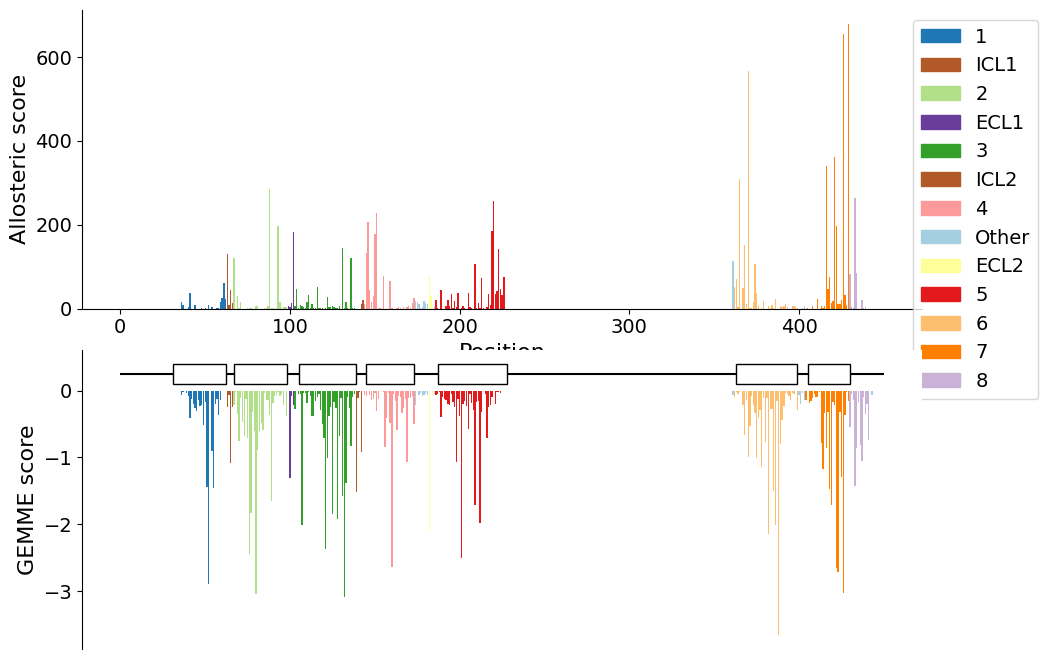

In [12]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([all_data_drd2.Position.dropna().astype("int").to_list(), 
                        all_data_drd2["Gpi score1"].to_list(), 
                        drd2_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", legend=True)

to_plot = pd.DataFrame([all_data_drd2.Position.dropna().astype("int").to_list(), 
                        drd2_gemme_mean.iloc[:, 0].to_list(), 
                        drd2_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
#axes[0].get_xaxis().set_visible(True)
axes[0].tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes[1], legend=False)
axes[1].hlines(xmin=0, xmax=450, y=0.25, color="black", zorder=1)
#TM1
p = plt.Rectangle((31, 0.1), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((67, 0.1), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((105, 0.1), 34, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((145, 0.1), 28, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((187, 0.1), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((363, 0.1), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((405, 0.1), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.14, left=0.2)
fig.savefig("plots/gemme_allo_scores_drd2.png", dpi=720, transparent=True, )

In [13]:
drd2_gemme_mean.sort_values(0).head(10)

,0,GPCR_Ref,Helix
V388,-3.664567,6.50,6
V132,-3.083286,3.50,3
V80,-3.038897,2.50,2
V426,-3.025022,7.53,7
V52,-2.898753,1.50,1
V423,-2.715496,7.50,7
V422,-2.648287,7.49,7
V160,-2.642370,4.50,4
V201,-2.502477,5.50,5
V76,-2.439246,2.46,2


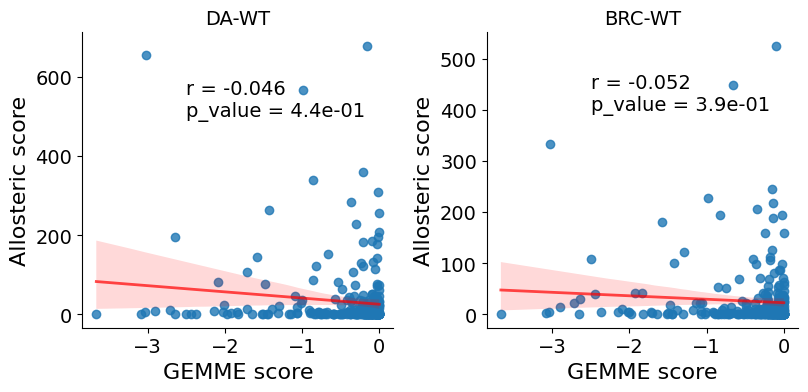

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8.3, 4.15), sharex=True, tight_layout=True)
#axes = axes.flatten()
to_plot = pd.DataFrame([drd2_gemme_mean[0].to_list(), all_data_drd2["Gpi score1"].to_list(), ]).T
to_plot.columns = ["x", "y"]
plot_allo_gemme_corr(to_plot, xann=-2.5, yann=500, ax=axes[0], title="DA-WT")

to_plot = pd.DataFrame([drd2_gemme_mean[0].to_list(), all_data_drd2["Gpi score1.1"].to_list(), ]).T
to_plot.columns = ["x", "y"]
axes[1] = plot_allo_gemme_corr(to_plot, xann=-2.5, yann=400, ax=axes[1], title="BRC-WT")
fig.savefig("plots/drd2_gemme_allo_corr.png", dpi=720, transparent=True)

In [15]:
# Bottom gemme, top allo
score_df.loc[(score_df.Allo > 19) & (score_df.GEMME > -0.2),].to_csv("bottom_gemme_top_allo_drd2.csv", index=False)

# Top gemme, top allo
score_df.loc[(score_df.Allo > 19) & (score_df.GEMME < -1.3),].to_csv("top_gemme_top_allo_drd2.csv", index=False)

# DRD3

In [16]:
drd3_gemme = pd.read_table("data/DRD3/1e-10/normPred_evolCombi.txt", sep=" ").T
drd3_gemme_mean = drd3_gemme.mean(axis=1).to_frame()
drd3_num = pd.read_csv("data/DRD3/DRD3_numbering.csv", header=None, sep=";")
drd3_num[1] = drd3_num[1].str.replace(r'[A-Y]', "").astype("int")
drd3_num.index = drd3_num[1]
drd3_gemme_mean.index = drd3_gemme_mean.index.to_frame()[0].str.replace("V", "").astype('int')
drd3_gemme_mean = drd3_gemme_mean.merge(drd3_num[0].to_frame(), how="left", left_index=True, right_index=True)

drd3_gemme_mean = drd3_gemme_mean.rename({"0_y": "GPCR_Ref"}, axis=1)
drd3_gemme_mean["Helix"] = [str(x).split(".")[0] for x in drd3_gemme_mean.GPCR_Ref.fillna(0.0)]

/scratch/40851694/ipykernel_3847/1405115030.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  drd3_num[1] = drd3_num[1].str.replace(r'[A-Y]', "").astype("int")


In [17]:
drd3_num

,0,1,2,3,4
1,,,,,
26,1.29,26,NaN,NaN,NaN
27,1.30,27,NaN,NaN,NaN
28,1.31,28,NaN,NaN,NaN
29,1.32,29,NaN,NaN,NaN
30,1.33,30,NaN,NaN,NaN
...,...,...,...,...,...
395,8.55,395,NaN,NaN,NaN
396,8.56,396,NaN,NaN,NaN
397,8.57,397,NaN,NaN,NaN


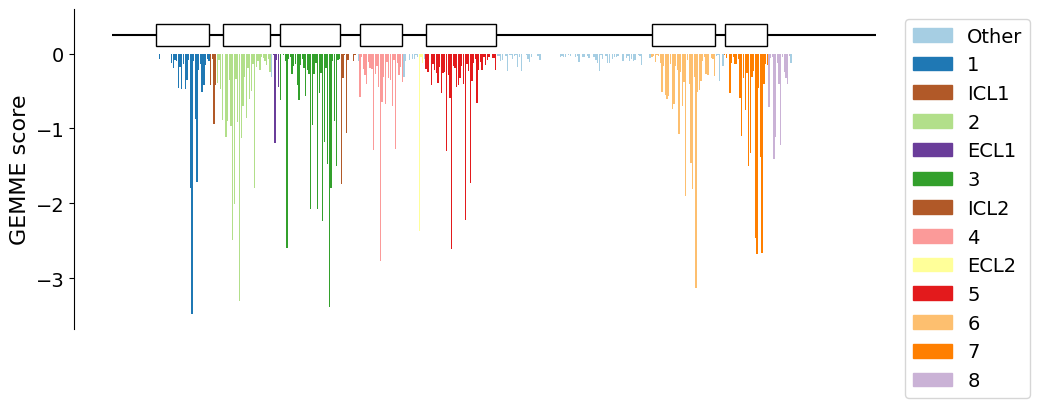

In [18]:
fig, axes = plt.subplots(figsize=(12, 4.15))
to_plot = pd.DataFrame([drd3_gemme_mean.index.astype("int").to_list(), 
                        drd3_gemme_mean.iloc[:, 0].to_list(), 
                        drd3_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
#axes[0].get_xaxis().set_visible(True)
axes.tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes, legend=True)
axes.hlines(xmin=0, xmax=450, y=0.25, color="black", zorder=1)
#TM1
p = plt.Rectangle((26, 0.1), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((65, 0.1), 28, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((99, 0.1), 35, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((146, 0.1), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((185, 0.1), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((318, 0.1), 37, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((361, 0.1), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
axes.get_xaxis().set_visible(False)
axes.spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.14, left=0.2)
fig.savefig("plots/gemme_allo_scores_drd3.png", dpi=720, transparent=True, )

In [19]:
drd3_gemme_mean["0_x"].sort_values().head(10)

0
47    -3.477770
128   -3.389905
75    -3.302560
344   -3.133076
158   -2.774815
380   -2.673562
383   -2.660613
200   -2.612684
103   -2.597369
71    -2.493351
Name: 0_x, dtype: float64

# DRD4

In [31]:
drd4_gemme = pd.read_table("data/DRD4/1e-10/normPred_evolCombi.txt", sep=" ").T
drd4_gemme_mean = drd4_gemme.mean(axis=1).to_frame()
drd4_num = pd.read_csv("data/DRD4/DRD4_numbering.csv", sep=";")
drd4_num['1'] = drd4_num["Position"].astype("int")
drd4_num.index = drd4_num['1']
drd4_gemme_mean.index = drd4_gemme_mean.index.to_frame()[0].str.replace("V", "").astype('int')
drd4_gemme_mean = drd4_gemme_mean.merge(drd4_num['0'].to_frame(), how="left", left_index=True, right_index=True)

drd4_gemme_mean = drd4_gemme_mean.rename({"0": "GPCR_Ref"}, axis=1)
drd4_gemme_mean["Helix"] = [str(x).split(".")[0] for x in drd4_gemme_mean.GPCR_Ref.fillna(0.0)]

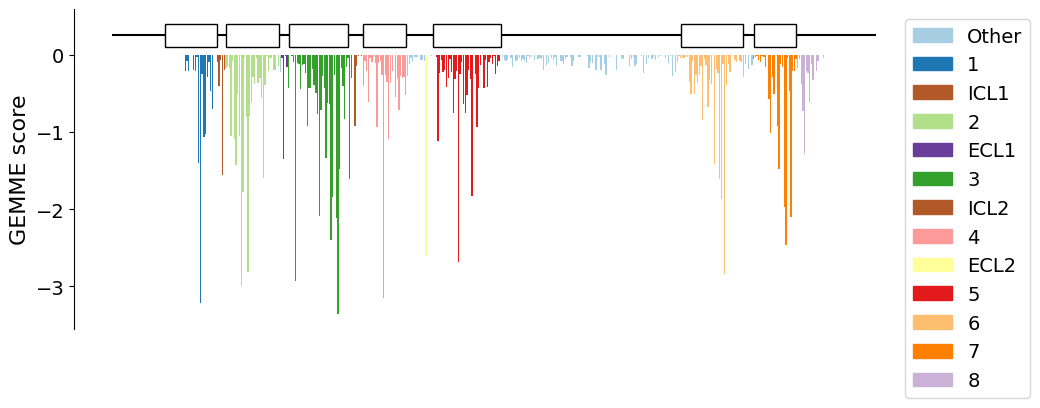

In [34]:
fig, axes = plt.subplots(figsize=(12, 4.15))
to_plot = pd.DataFrame([drd4_gemme_mean.index.astype("int").to_list(), 
                        drd4_gemme_mean.iloc[:, 0].to_list(), 
                        drd4_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
#axes[0].get_xaxis().set_visible(True)
axes.tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes, legend=True)
axes.hlines(xmin=0, xmax=450, y=0.25, color="black", zorder=1)
#TM1
p = plt.Rectangle((31, 0.1), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((67, 0.1), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((104, 0.1), 35, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((148, 0.1), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((189, 0.1), 40, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((335, 0.1), 37, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((378, 0.1), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
axes.get_xaxis().set_visible(False)
axes.spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.14, left=0.2)
fig.savefig("plots/gemme_allo_scores_drd4.png", dpi=720, transparent=True, )

In [36]:
drd4_gemme_mean[0].sort_values().head(10)

0
133   -3.356747
52    -3.217143
160   -3.144938
76    -2.994651
108   -2.926623
361   -2.832027
80    -2.806173
204   -2.681478
185   -2.610515
397   -2.465589
Name: 0, dtype: float64

# DRD5

In [37]:
drd5_gemme = pd.read_table("data/DRD5/1e-10/normPred_evolCombi.txt", sep=" ").T
drd5_gemme_mean = drd5_gemme.mean(axis=1).to_frame()
drd5_num = pd.read_csv("data/DRD5/DRD5_numbering.csv", header=None, sep=";")
drd5_num[1] = drd5_num[1].str.replace(r'[A-Y]', "").astype("int")
drd5_num.index = drd5_num[1]
drd5_gemme_mean.index = drd5_gemme_mean.index.to_frame()[0].str.replace("V", "").astype('int')
drd5_gemme_mean = drd5_gemme_mean.merge(drd5_num[0].to_frame(), how="left", left_index=True, right_index=True)

drd5_gemme_mean = drd5_gemme_mean.rename({"0_y": "GPCR_Ref"}, axis=1)
drd5_gemme_mean["Helix"] = [str(x).split(".")[0] for x in drd5_gemme_mean.GPCR_Ref.fillna(0.0)]

/scratch/40851694/ipykernel_3847/3055143245.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  drd5_num[1] = drd5_num[1].str.replace(r'[A-Y]', "").astype("int")


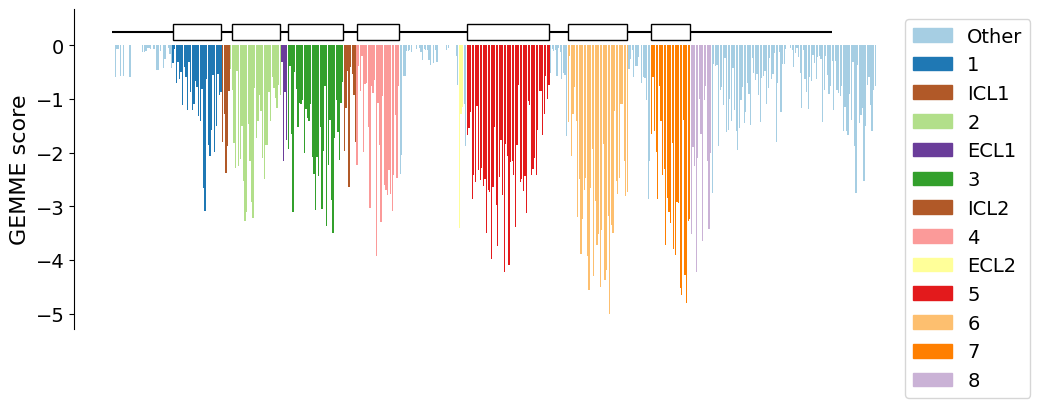

In [38]:
fig, axes = plt.subplots(figsize=(12, 4.15))
to_plot = pd.DataFrame([drd5_gemme_mean.index.astype("int").to_list(), 
                        drd5_gemme_mean.iloc[:, 0].to_list(), 
                        drd5_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
#axes[0].get_xaxis().set_visible(True)
axes.tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes, legend=True)
axes.hlines(xmin=0, xmax=450, y=0.25, color="black", zorder=1)
#TM1
p = plt.Rectangle((38, 0.1), 30, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((75, 0.1), 30, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((110, 0.1), 34, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((153, 0.1), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((222, 0.1), 51, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((285, 0.1), 37, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((337, 0.1), 24, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
axes.get_xaxis().set_visible(False)
axes.spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.14, left=0.2)
fig.savefig("plots/gemme_allo_scores_drd5.png", dpi=720, transparent=True, )

In [39]:
drd5_gemme_mean["0_x"].sort_values().head(10)

0
311   -5.006207
359   -4.803479
356   -4.659239
298   -4.550819
355   -4.512360
305   -4.492998
308   -4.374197
301   -4.297001
358   -4.271762
365   -4.230227
Name: 0_x, dtype: float64

# Overlap of allo with DBs

## gnomAD

### DRD1

In [40]:
drd1_dbs = pd.read_csv("data/gnomad/gnomAD_v3.1.2_ENSG00000184845_2023_08_22_00_38_59.csv")
drd1_dbs = drd1_dbs[~drd1_dbs["Protein Consequence"].isna() & (drd1_dbs["VEP Annotation"] == "missense_variant")]

contact_data_gp = pd.read_excel("data/DRD1/Gp_contacts.xlsx")
contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]

contact_data_lig = pd.read_excel("data/DRD1/D1_ligandContactData.xls")
#contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]
contact_data_lig = contact_data_lig.columns[1:].to_frame()
contact_data_lig.loc['L157 (190)'] = 'L157 (190,)'
contact_data_lig["Position"] = [int(x.split("(")[1].split(",")[0]) for x in contact_data_lig[0]]

contact_data_lig

,0,Position
"D84 (103, 3.32)","D84 (103, 3.32)",103
"I85 (104, 3.33)","I85 (104, 3.33)",104
"S88 (107, 3.36)","S88 (107, 3.36)",107
"T89 (108, 3.37)","T89 (108, 3.37)",108
"I135 (154, 4.56)","I135 (154, 4.56)",154
"S155 (188, ECL2)","S155 (188, ECL2)",188
L157 (190),"L157 (190,)",190
"A162 (195, 5.39)","A162 (195, 5.39)",195
"S165 (198, 5.42)","S165 (198, 5.42)",198
"S166 (199, 5.43)","S166 (199, 5.43)",199


In [41]:
drd1_dbs["Position"] = [x[5:-3] for x in drd1_dbs["Protein Consequence"]]

drd1_dbs[["Protein Consequence", "Position"]]

,Protein Consequence,Position
12,p.Thr446Ile,446
13,p.Thr446Ala,446
14,p.His444Tyr,444
15,p.Gln443His,443
16,p.Gln443Arg,443
...,...,...
205,p.Met9Val,9
207,p.Ser7Pro,7
209,p.Thr6Ser,6
210,p.Leu4Pro,4


In [42]:
drd1_dbs_freq = drd1_dbs.Position.value_counts().to_frame()

drd1_dbs_freq.columns = ["Freqs"]

drd1_gemme_mean

,0,GPCR_Ref,Helix
V20,-0.192536,NaN,0
V21,-0.650230,1.30,1
V22,-0.071152,1.31,1
V23,-0.809368,1.32,1
V24,-0.717863,1.33,1
...,...,...,...
V340,-2.076260,8.53,8
V341,-3.930502,8.54,8
V342,-1.609981,8.55,8
V343,-0.420100,8.56,8


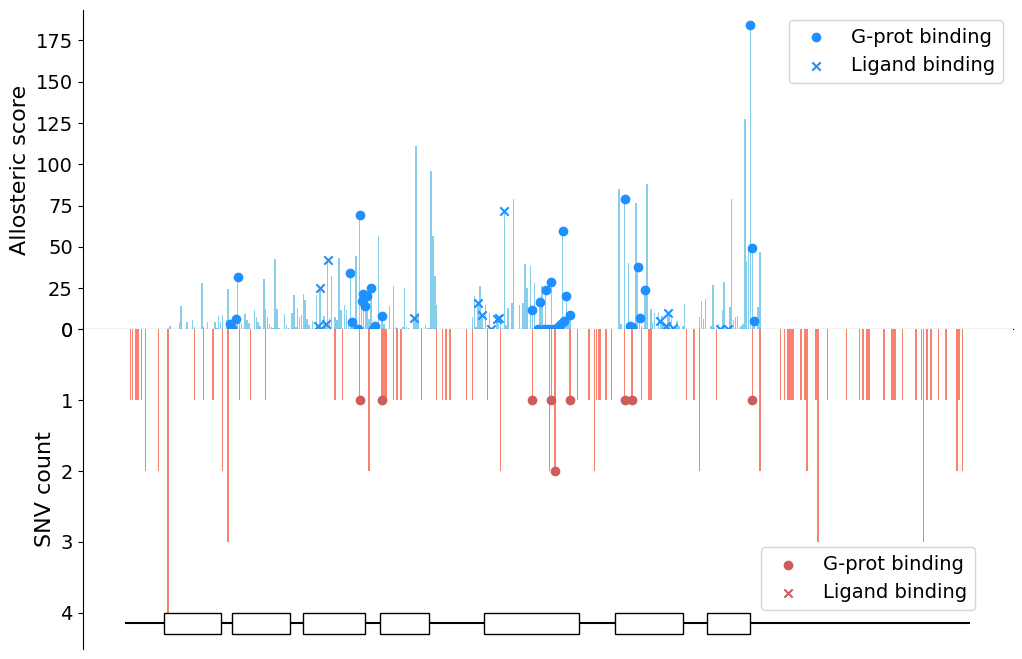

In [43]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([all_data_drd1["Position"].astype("int").to_list(), 
                        all_data_drd1["Gpi score1"].to_list()]).T#, 
                        #drd1_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot[0] = to_plot[0].astype('int')
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", color="skyblue", label="Allosteric\nscore", legend=False)


temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[0].scatter(temp["Position"], temp["GEMME"], color="dodgerblue")
axes[0].scatter(temp1["Position"], temp1["GEMME"], color="dodgerblue", marker="x")
axes[0].tick_params(labelbottom=True)
axes[0].set_xlabel("")
axes[0].legend(["G-prot binding", "Ligand binding"])
to_plot = pd.DataFrame([drd1_dbs_freq.index.astype(int).to_list(), 
                        drd1_dbs_freq.Freqs.to_list()]).T

plot_gemme(to_plot, ax=axes[1], color="salmon", label="SNV\ncount", legend_box=(0.95, 1.0), legend=False,  ylab="SNV count")
temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[1].scatter(temp["Position"], temp["GEMME"], color="indianred")
axes[1].scatter(temp1["Position"], temp1["GEMME"], color="indianred", marker="x")
axes[1].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.97, 0.35))

axes[1].hlines(xmin=0, xmax=450, y=4.15, color="black", zorder=1)

#TM1
p = plt.Rectangle((21, 4), 30, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((57, 4), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((95, 4), 33, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((136, 4), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((191, 4), 51, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((261, 4), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((310, 4), 23, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)

axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].invert_yaxis()
plt.subplots_adjust(hspace=0.0)



plt.savefig("plots/gnomad_allo_scores_drd1.png", dpi=720, transparent=True)

### DRD2

In [44]:
drd2_dbs = pd.read_csv("data/gnomad/gnomAD_v3.1.2_ENSG00000149295_2023_08_22_01_03_37.csv")
drd2_dbs = drd2_dbs[~drd2_dbs["Protein Consequence"].isna() & (drd2_dbs["VEP Annotation"] == "missense_variant")]

In [45]:
contact_data_gp = pd.read_excel("data/DRD2/Gp_contacts.xlsx", sheet_name=1)
contact_data_gp.iloc[7] = "(140,)"
contact_data_gp.iloc[8] = "(142,)"
contact_data_gp.iloc[9] = "(143,)"
contact_data_gp.iloc[14] = "(362,)"
contact_data_gp.iloc[15] = "(363,)"
contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]

In [46]:
contact_data_lig = pd.read_excel("data/DRD2/D2_ligandContactData.xls")
#contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]
contact_data_lig = contact_data_lig.columns[1:].to_frame()
#contact_data_lig.loc['L157 (190)'] = 'L157 (190,)'
contact_data_lig["Position"] = [int(x.split("(")[1].split(",")[0]) for x in contact_data_lig[0]]

In [47]:
drd2_dbs["Position"] = [x[5:-3] for x in drd2_dbs["Protein Consequence"]]

drd2_dbs[["Protein Consequence", "Position"]]

,Protein Consequence,Position
19,p.Cys443Phe,443
20,p.His442Arg,442
21,p.His442Tyr,442
26,p.Ile431Thr,431
33,p.Val421Ala,421
...,...,...
483,p.Gly24Glu,24
484,p.Gly24Arg,24
487,p.Arg20Gln,20
488,p.Arg20Pro,20


In [48]:
drd2_dbs_freq = drd2_dbs.Position.value_counts().to_frame()

drd2_dbs_freq.columns = ["Freqs"]

drd2_gemme_mean

,0,GPCR_Ref,Helix
V32,0.000000,1.30,1
V33,0.000000,1.31,1
V34,0.000000,1.32,1
V35,0.000000,1.33,1
V36,-0.061398,1.34,1
...,...,...,...
V439,-0.351639,8.56,8
V440,-0.202077,8.57,8
V441,-0.742243,8.58,8
V442,0.000000,8.59,8


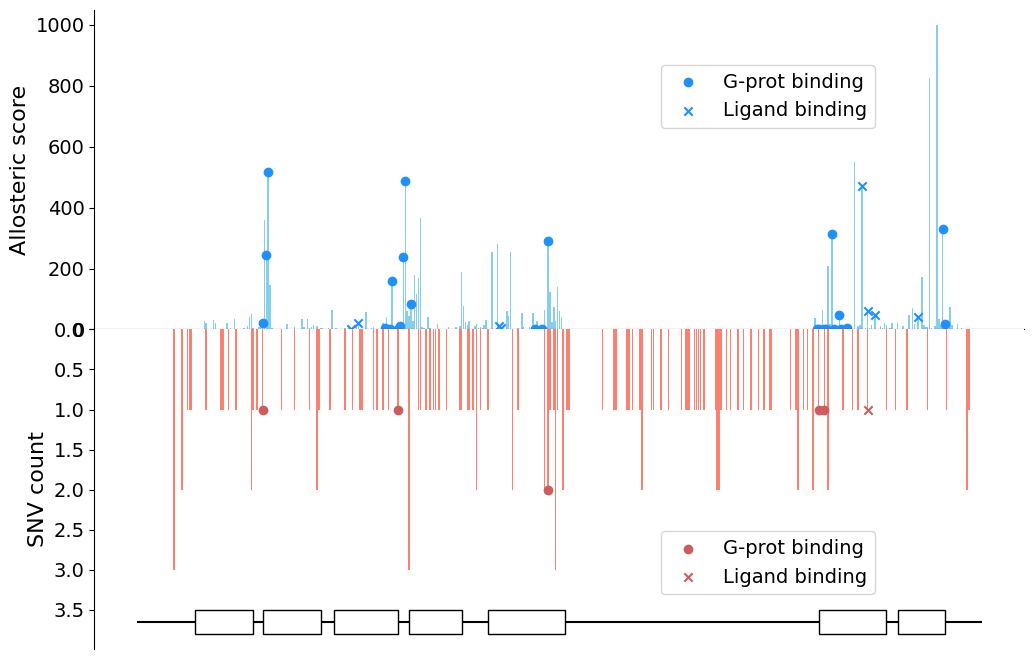

In [49]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([all_data_drd2["Position"].astype("int").to_list(), 
                        all_data_drd2["Gpi score2"].to_list()]).T#, 
                        #drd2_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot[0] = to_plot[0].astype('int')
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", color="skyblue", label="Allosteric\nscore", legend=False)

temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[0].scatter(temp["Position"], temp["GEMME"], color="dodgerblue")
axes[0].scatter(temp1["Position"], temp1["GEMME"], color="dodgerblue", marker="x")
axes[0].tick_params(labelbottom=True)
axes[0].set_xlabel("")
axes[0].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.85, 0.6))


to_plot = pd.DataFrame([drd2_dbs_freq.index.astype(int).to_list(), 
                        drd2_dbs_freq.Freqs.to_list()]).T

axes[0].tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes[1], color="salmon", label="SNV\ncount", legend_box=(0.95, 1.0), legend=False,  ylab="SNV count")

temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[1].scatter(temp["Position"], temp["GEMME"], color="indianred")
axes[1].scatter(temp1["Position"], temp1["GEMME"], color="indianred", marker="x")
axes[1].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.85, 0.4))

axes[1].hlines(xmin=0, xmax=450, y=3.65, color="black", zorder=1)

#TM1
p = plt.Rectangle((31, 3.5), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((67, 3.5), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((105, 3.5), 34, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((145, 3.5), 28, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((187, 3.5), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((363, 3.5), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((405, 3.5), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)

axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].invert_yaxis()
plt.subplots_adjust(hspace=0.)
plt.savefig("plots/gnomad_allo_scores_drd2.png", dpi=720, transparent=True)

## ClinVar

### DRD1

In [50]:
drd1_dbs = pd.read_table("data/clinvar/clinvar_result_DRD1.txt", sep="\t")
drd1_dbs = drd1_dbs[~drd1_dbs["Protein change"].isna()]

contact_data_gp = pd.read_excel("data/DRD1/Gp_contacts.xlsx")
contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]

contact_data_lig = pd.read_excel("data/DRD1/D1_ligandContactData.xls")
#contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]
contact_data_lig = contact_data_lig.columns[1:].to_frame()
contact_data_lig.loc['L157 (190)'] = 'L157 (190,)'
contact_data_lig["Position"] = [int(x.split("(")[1].split(",")[0]) for x in contact_data_lig[0]]

contact_data_lig

,0,Position
"D84 (103, 3.32)","D84 (103, 3.32)",103
"I85 (104, 3.33)","I85 (104, 3.33)",104
"S88 (107, 3.36)","S88 (107, 3.36)",107
"T89 (108, 3.37)","T89 (108, 3.37)",108
"I135 (154, 4.56)","I135 (154, 4.56)",154
"S155 (188, ECL2)","S155 (188, ECL2)",188
L157 (190),"L157 (190,)",190
"A162 (195, 5.39)","A162 (195, 5.39)",195
"S165 (198, 5.42)","S165 (198, 5.42)",198
"S166 (199, 5.43)","S166 (199, 5.43)",199


In [51]:
drd1_dbs["Position"] = [x[1:-1] for x in drd1_dbs["Protein change"]]

drd1_dbs_freq = drd1_dbs.Position.value_counts().to_frame()

drd1_dbs_freq.columns = ["Freqs"]

drd1_gemme_mean

,0,GPCR_Ref,Helix
V20,-0.192536,NaN,0
V21,-0.650230,1.30,1
V22,-0.071152,1.31,1
V23,-0.809368,1.32,1
V24,-0.717863,1.33,1
...,...,...,...
V340,-2.076260,8.53,8
V341,-3.930502,8.54,8
V342,-1.609981,8.55,8
V343,-0.420100,8.56,8


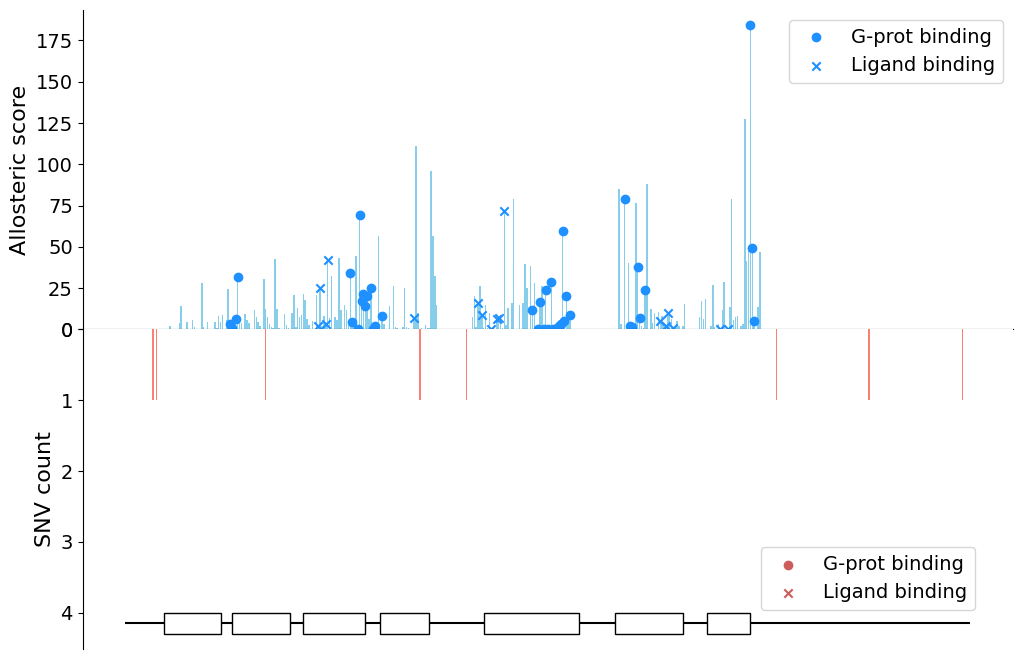

In [52]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([all_data_drd1["Position"].astype("int").to_list(), 
                        all_data_drd1["Gpi score1"].to_list()]).T#, 
                        #drd1_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot[0] = to_plot[0].astype('int')
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", color="skyblue", label="Allosteric\nscore", legend=False)


temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[0].scatter(temp["Position"], temp["GEMME"], color="dodgerblue")
axes[0].scatter(temp1["Position"], temp1["GEMME"], color="dodgerblue", marker="x")
axes[0].tick_params(labelbottom=True)
axes[0].set_xlabel("")
axes[0].legend(["G-prot binding", "Ligand binding"])
to_plot = pd.DataFrame([drd1_dbs_freq.index.astype(int).to_list(), 
                        drd1_dbs_freq.Freqs.to_list()]).T

plot_gemme(to_plot, ax=axes[1], color="salmon", label="SNV\ncount", legend_box=(0.95, 1.0), legend=False,  ylab="SNV count")
temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[1].scatter(temp["Position"], temp["GEMME"], color="indianred")
axes[1].scatter(temp1["Position"], temp1["GEMME"], color="indianred", marker="x")
axes[1].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.97, 0.35))

axes[1].hlines(xmin=0, xmax=450, y=4.15, color="black", zorder=1)

#TM1
p = plt.Rectangle((21, 4), 30, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((57, 4), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((95, 4), 33, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((136, 4), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((191, 4), 51, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((261, 4), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((310, 4), 23, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)

axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].invert_yaxis()
plt.subplots_adjust(hspace=0.0)



plt.savefig("plots/clinvar_allo_scores_drd1.png", dpi=720, transparent=True)

### DRD2

In [53]:
drd2_dbs = pd.read_table("data/clinvar/clinvar_result_DRD2.txt", sep="\t")
drd2_dbs = drd2_dbs[~drd2_dbs["Protein change"].isna()]
drd2_dbs = drd2_dbs.reset_index()
contact_data_gp = pd.read_excel("data/DRD2/Gp_contacts.xlsx")
contact_data_gp.iloc[7] = "(140,)"
contact_data_gp.iloc[8] = "(142,)"
contact_data_gp.iloc[9] = "(143,)"
contact_data_gp.iloc[14] = "(362,)"
contact_data_gp.iloc[15] = "(363,)"
contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]

contact_data_lig = pd.read_excel("data/DRD2/D2_ligandContactData.xls")
contact_data_lig = contact_data_lig.columns[1:].to_frame()
#contact_data_lig.loc['L157 (190)'] = 'L157 (190,)'
contact_data_lig["Position"] = [int(x.split("(")[1].split(",")[0]) for x in contact_data_lig[0]]

In [54]:
drd2_dbs["Position"] = [x[1:-1] for x in drd2_dbs["Protein change"]]

for ind, x in enumerate(drd2_dbs["Position"].to_list()):
    try:
        int(x)
    except ValueError:
        drd2_dbs["Position"][ind] = drd2_dbs["Position"][ind][:3]
        temp = drd2_dbs.iloc[ind, :]
        temp["Position"] = temp["Position"][-3:]
        drd2_dbs = drd2_dbs.append(temp)

drd2_dbs_freq = drd2_dbs.Position.value_counts().to_frame()

drd2_dbs_freq.columns = ["Freqs"]

/scratch/40851694/ipykernel_3847/791611643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drd2_dbs["Position"][ind] = drd2_dbs["Position"][ind][:3]
/scratch/40851694/ipykernel_3847/791611643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Position"] = temp["Position"][-3:]
/scratch/40851694/ipykernel_3847/791611643.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drd2_dbs = drd2_dbs.append(temp)
/scratch/40851694/ipykernel_3847/791611643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

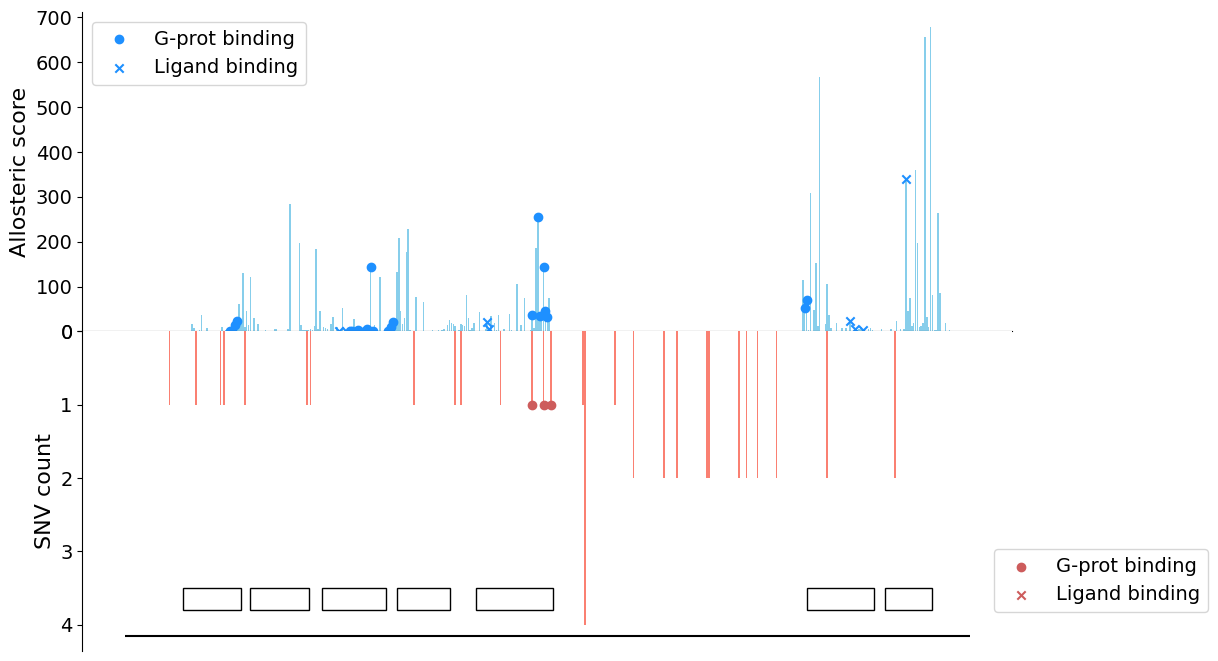

In [55]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([all_data_drd2["Position"].astype("int").to_list(), 
                        all_data_drd2["Gpi score1"].to_list()]).T#, 
                        #drd2_gemme_mean.loc[:, "Helix"].to_list()]).T
to_plot[0] = to_plot[0].astype('int')
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", color="skyblue", label="Allosteric\nscore", legend=False)


temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[0].scatter(temp["Position"], temp["GEMME"], color="dodgerblue")
axes[0].scatter(temp1["Position"], temp1["GEMME"], color="dodgerblue", marker="x")
axes[0].tick_params(labelbottom=True)
axes[0].set_xlabel("")
axes[0].legend(["G-prot binding", "Ligand binding"])
to_plot = pd.DataFrame([drd2_dbs_freq.index.astype(int).to_list(), 
                        drd2_dbs_freq.Freqs.to_list()]).T

plot_gemme(to_plot, ax=axes[1], color="salmon", label="SNV\ncount", legend_box=(0.95, 1.0), legend=False,  ylab="SNV count")
temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[1].scatter(temp["Position"], temp["GEMME"], color="indianred")
axes[1].scatter(temp1["Position"], temp1["GEMME"], color="indianred", marker="x")
axes[1].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.97, 0.35))

axes[1].hlines(xmin=0, xmax=450, y=4.15, color="black", zorder=1)

#TM1
p = plt.Rectangle((31, 3.5), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((67, 3.5), 31, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((105, 3.5), 34, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((145, 3.5), 28, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((187, 3.5), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((363, 3.5), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((405, 3.5), 25, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)

axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].invert_yaxis()
plt.subplots_adjust(hspace=0.0)



plt.savefig("plots/clinvar_allo_scores_drd2.png", dpi=720, transparent=True)

# Corr with experiment 

#split by ligand as well

In [56]:
exp_data_drd1 = pd.read_table("data/DRD1/delta_experimental_data_DRD1.tsv", sep="\t").dropna()
exp_data_drd1["dEfficacy_normalized"] = exp_data_drd1["dEfficacy_normalized"].astype("float")
exp_data_drd1["Ligand"] = [x[0] for x in exp_data_drd1.Label.str.split("-")]
exp_data_drd1.rename({"Mut for GEMME": "Mutant"}, inplace=True, axis=1)
exp_data_drd1

,Position,Mutant,Label,dEfficacy,dLogEC50,dEfficacy_normalized,GEMME_score,Ligand
2,144.0,I144N,DA-I4.46N-Gs,88.00,0.415,88.000000,-2.945719,DA
3,144.0,I144N,BRC-I4.46N-Gs,26.18,0.199,45.411969,-2.945719,BRC
4,281.0,F281M,DA-F6.44M-Gs,41.10,-0.538,41.100000,-3.891959,DA
5,281.0,F281M,BRC-F6.44M-Gs,120.15,-0.392,208.412836,-3.891959,BRC
6,281.0,F281M,DA-F6.44I-Gs,51.40,-1.028,51.400000,-3.891959,DA
7,281.0,F281M,BRC-F6.44I-Gs,70.55,-0.437,122.376409,-3.891959,BRC
8,112.0,L112H,DA-L3.41H-Gs,76.10,-0.935,76.100000,-1.854822,DA
9,112.0,L112H,BRC-L3.41H-Gs,104.15,-0.217,180.659150,-1.854822,BRC
10,284.0,C284L,DA-C6.47L-Gs,19.60,-0.935,19.600000,-3.607673,DA
11,284.0,C284L,BRC-C6.47L-Gs,20.68,-0.223,35.871639,-3.607673,BRC


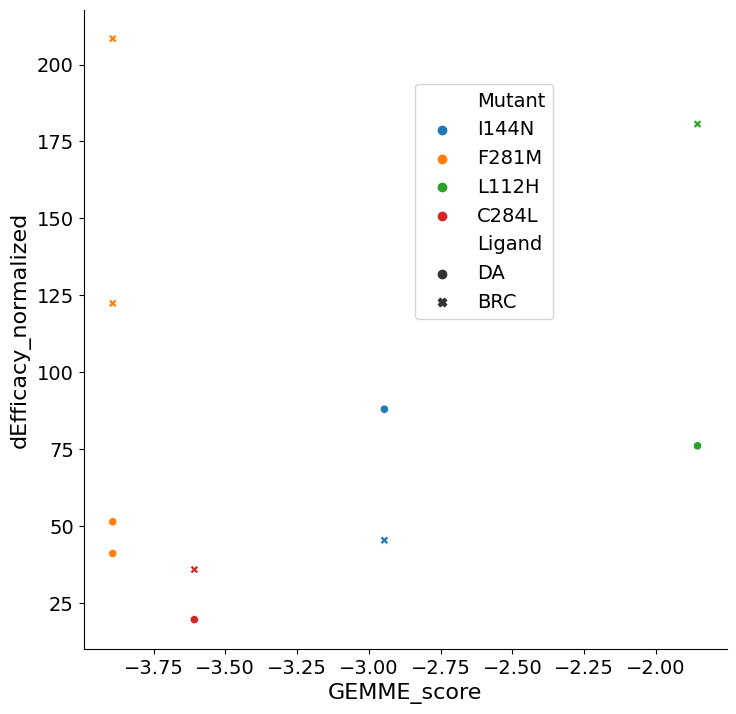

In [57]:
fig, ax = plt.subplots(figsize=(8.3, 8.3))
g = sns.scatterplot(data=exp_data_drd1, x="GEMME_score", y="dEfficacy_normalized", style="Ligand", hue="Mutant", ax= ax)
g.legend(loc='center left', bbox_to_anchor=(0.5, 0.7), ncol=1)
sns.despine()
fig.savefig("plots/gemme_act_deff_drd1.png", dpi=720, transparent=True)

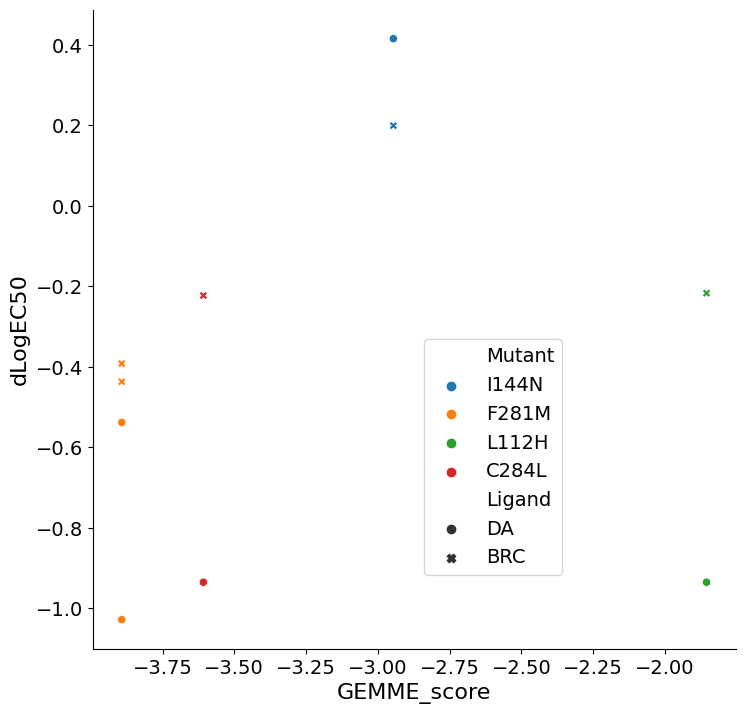

In [58]:
fig, ax = plt.subplots(figsize=(8.3, 8.3))
g = sns.scatterplot(data=exp_data_drd1, x="GEMME_score", y="dLogEC50", style="Ligand", hue="Mutant", ax=ax)
g.legend(loc='center left', bbox_to_anchor=(0.5, 0.3), ncol=1)
sns.despine()
fig.savefig("plots/gemme_act_dlog50_drd1.png", dpi=720, transparent=True)

## DRD2

In [59]:
exp_data_drd2 = pd.read_table("data/DRD2/delta_experimental_data_DRD2.tsv", sep="\t").dropna()
exp_data_drd2["Ligand"] = [x[0] for x in exp_data_drd2.Label.str.split("-")]
exp_data_drd2.rename({"Mut for GEMME": "Mutant"}, inplace=True, axis=1)
exp_data_drd2["Modulator"] = [x[-1] for x in exp_data_drd2.Label.str.split("-")]

In [60]:
exp_data_drd2.Modulator.value_counts()

Gi       17
Barr2    11
Name: Modulator, dtype: int64

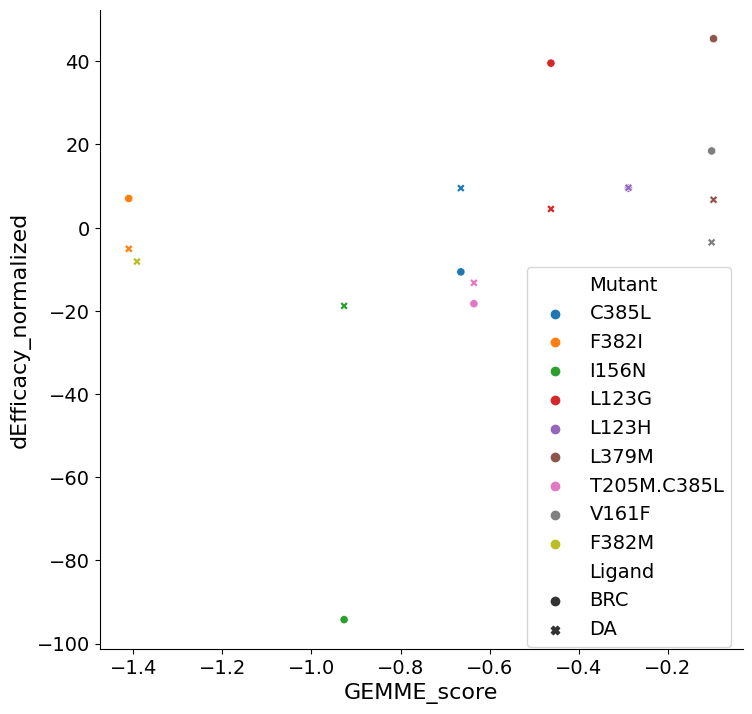

In [61]:
fig, ax = plt.subplots(figsize=(8.3, 8.3))
g = sns.scatterplot(data=exp_data_drd2[exp_data_drd2.Modulator == "Gi"], x="GEMME_score", y="dEfficacy_normalized", style="Ligand", hue="Mutant", ax=ax)
g.legend(loc='center left', bbox_to_anchor=(0.65, 0.3), ncol=1)
sns.despine()
fig.savefig("plots/gemme_act_deff_drd2_gi.png", dpi=720, transparent=True)

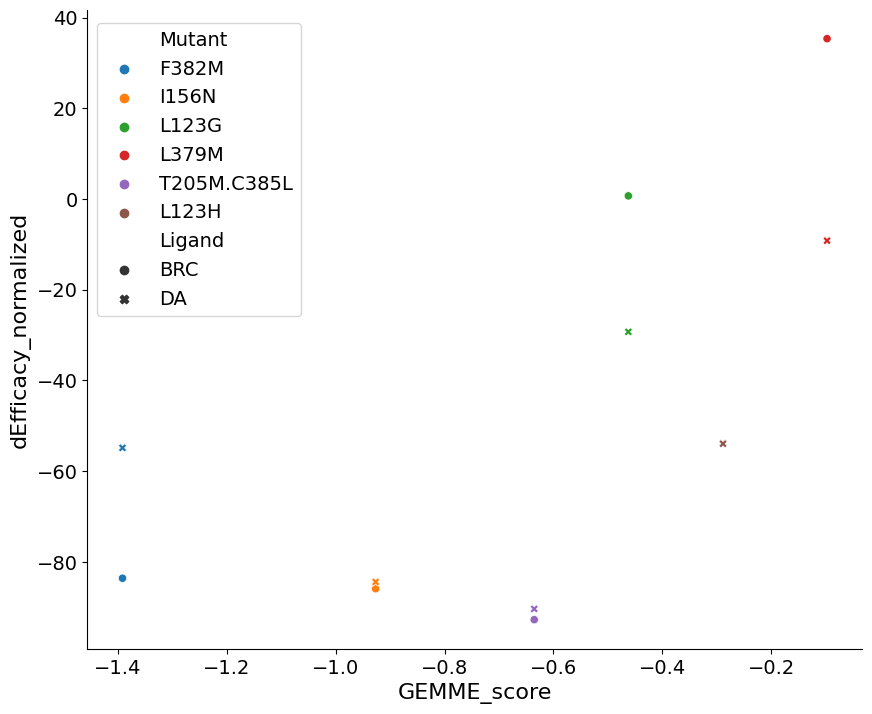

In [62]:
fig, ax = plt.subplots(figsize=(10, 8.3))
g = sns.scatterplot(data=exp_data_drd2[exp_data_drd2.Modulator == "Barr2"], x="GEMME_score", y="dEfficacy_normalized", style="Ligand", hue="Mutant", ax=ax)
g.legend(loc='center left', bbox_to_anchor=(0., 0.75), ncol=1)
sns.despine()
fig.savefig("gemme_act_deff_drd2_barr2.png", dpi=720, transparent=True)

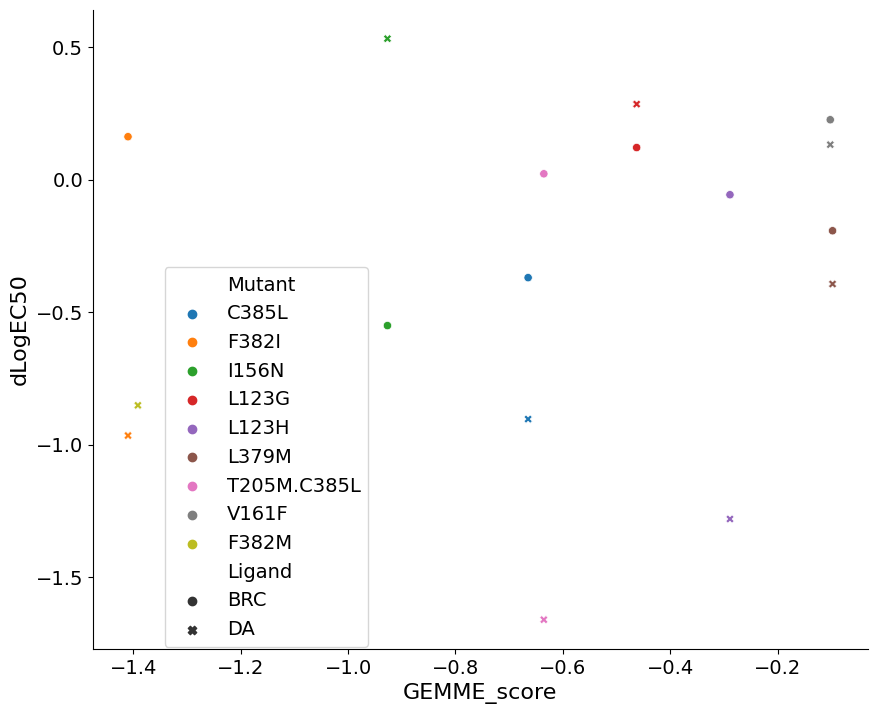

In [63]:
fig, ax = plt.subplots(figsize=(10, 8.3))
g = sns.scatterplot(data=exp_data_drd2[exp_data_drd2.Modulator == "Gi"], x="GEMME_score", y="dLogEC50", style="Ligand", hue="Mutant", ax=ax)
g.legend(loc='center left', bbox_to_anchor=(.08, 0.3), ncol=1)
sns.despine()
fig.savefig("plots/gemme_act_dlog50_drd2_gi.png", dpi=720, transparent=True)

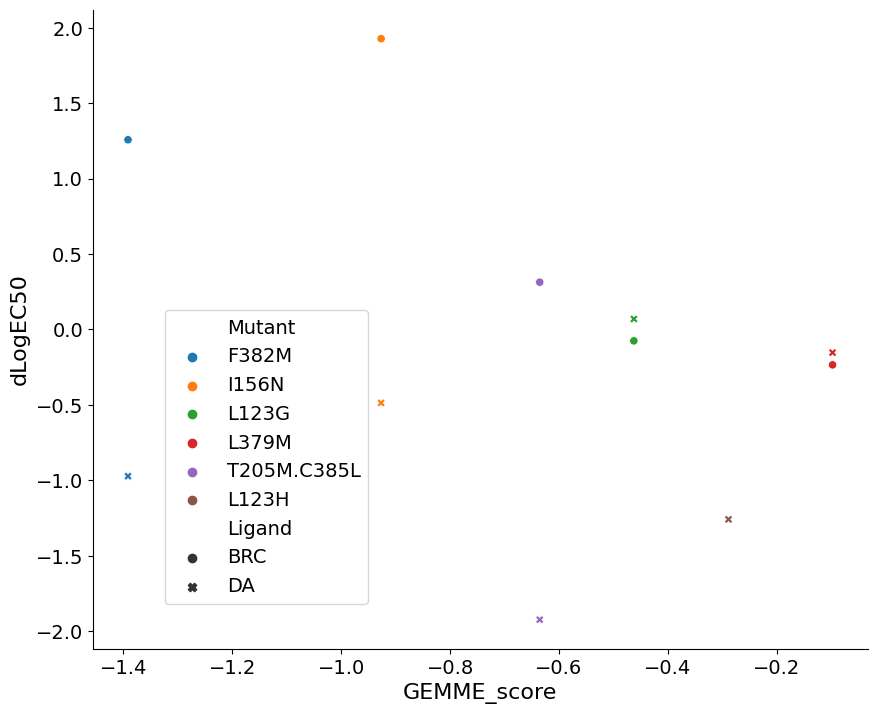

In [64]:
fig, ax = plt.subplots(figsize=(10, 8.3))
g = sns.scatterplot(data=exp_data_drd2[exp_data_drd2.Modulator == "Barr2"], x="GEMME_score", y="dLogEC50", style="Ligand", hue="Mutant", ax=ax)
g.legend(loc='center left', bbox_to_anchor=(0.08, 0.3), ncol=1)
sns.despine()
fig.savefig("plots/gemme_act_dlog50_drd2_barr2.png", dpi=720, transparent=True)

## MSA influence on scores DRD1:

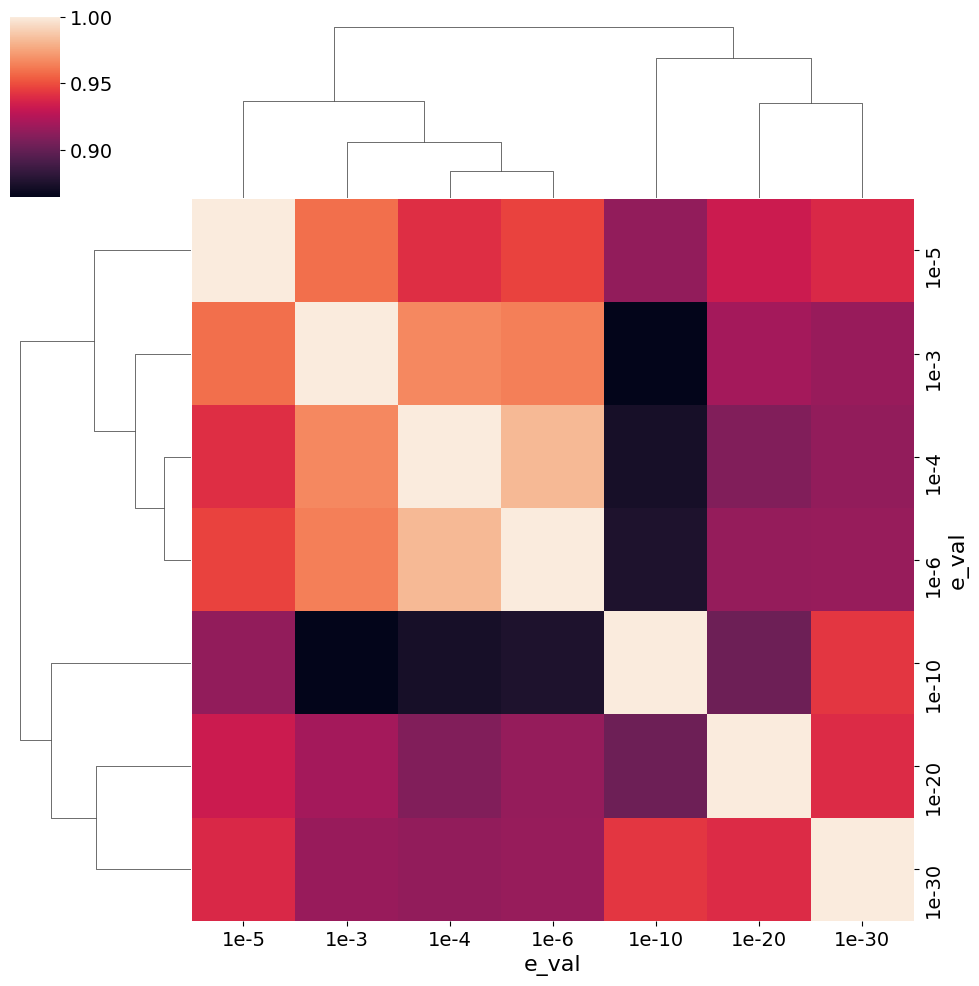

In [65]:
gemme_msa = pd.DataFrame()
e_vals = ["1e-3", "1e-4", "1e-5", "1e-6", "1e-10", "1e-20", "1e-30"]
for e in e_vals:
    temp = pd.read_table("data/DRD1/" + e + "/normPred_evolCombi.txt", sep=" ").T
    temp = temp.iloc[all_data_drd1.Position.dropna().astype("int") - 1, :].mean(axis=1).to_frame()
    temp["Positions"] = all_data_drd1.Position.dropna().astype("int").to_list()
    temp["e_val"] = e
    gemme_msa = pd.concat([gemme_msa, temp], axis=0)

gemme_msa_wide = gemme_msa.pivot_table(columns=["e_val"], values=0, index="Positions")

cormat = pd.DataFrame(sp.stats.spearmanr(gemme_msa_wide)[0], 
                      columns=gemme_msa_wide.columns,
                      index=gemme_msa_wide.columns)
sns.clustermap(cormat)

# Cluster DRDs

In [66]:
cluster_map = drd1_gemme_mean.merge(drd2_gemme_mean, "inner", on="GPCR_Ref", suffixes=["_d1", "_d2"])
cluster_map = cluster_map[~(cluster_map.GPCR_Ref.str.startswith("ICL") | cluster_map.GPCR_Ref.str.startswith("ECL"))]
cluster_map = cluster_map.merge(drd3_gemme_mean, "inner", left_on="GPCR_Ref", right_on="GPCR_Ref", suffixes=["", "_d3"])
cluster_map = cluster_map.merge(drd4_gemme_mean, "inner", left_on="GPCR_Ref", right_on="GPCR_Ref", suffixes=["_d3", "_d4"])
cluster_map = cluster_map.merge(drd5_gemme_mean.dropna(), "inner", left_on="GPCR_Ref", right_on="GPCR_Ref", suffixes=["", "_d5"])

In [67]:
cluster_map = cluster_map.dropna()
cluster_map

,0_d1,GPCR_Ref,Helix_d1,0_d2,Helix_d2,0_x,Helix_d3,0,Helix_d4,0_x_d5,Helix
0,-0.650230,1.30,1,0.000000,1,0.000000,1,0.000000,1,-0.332770,1
1,-0.071152,1.31,1,0.000000,1,-0.068476,1,0.000000,1,-0.069157,1
2,-0.809368,1.32,1,0.000000,1,0.000000,1,0.000000,1,-0.711325,1
3,-0.717863,1.33,1,0.000000,1,0.000000,1,0.000000,1,-0.321438,1
4,-0.905474,1.34,1,-0.061398,1,0.000000,1,0.000000,1,-0.633986,1
...,...,...,...,...,...,...,...,...,...,...,...
228,-2.076260,8.53,8,-0.820102,8,-0.406262,8,-0.241894,8,-1.663395,8
229,-3.930502,8.54,8,-1.060199,8,-1.223865,8,-0.615388,8,-3.651627,8
230,-1.609981,8.55,8,-0.089529,8,-0.042928,8,-0.119287,8,-1.023739,8
231,-0.420100,8.56,8,-0.351639,8,-0.243463,8,-0.330078,8,-0.761756,8


In [74]:
cormat_drd = sp.stats.spearmanr(cluster_map[["0_d1", "0_d2", "0_x", 0, "0_x_d5"]])[0]

In [75]:
cormat_drd

array([[1.        , 0.48818334, 0.46527304, 0.37616303, 0.85230606],
       [0.48818334, 1.        , 0.78651051, 0.70928481, 0.56365541],
       [0.46527304, 0.78651051, 1.        , 0.77296721, 0.61849442],
       [0.37616303, 0.70928481, 0.77296721, 1.        , 0.55300417],
       [0.85230606, 0.56365541, 0.61849442, 0.55300417, 1.        ]])

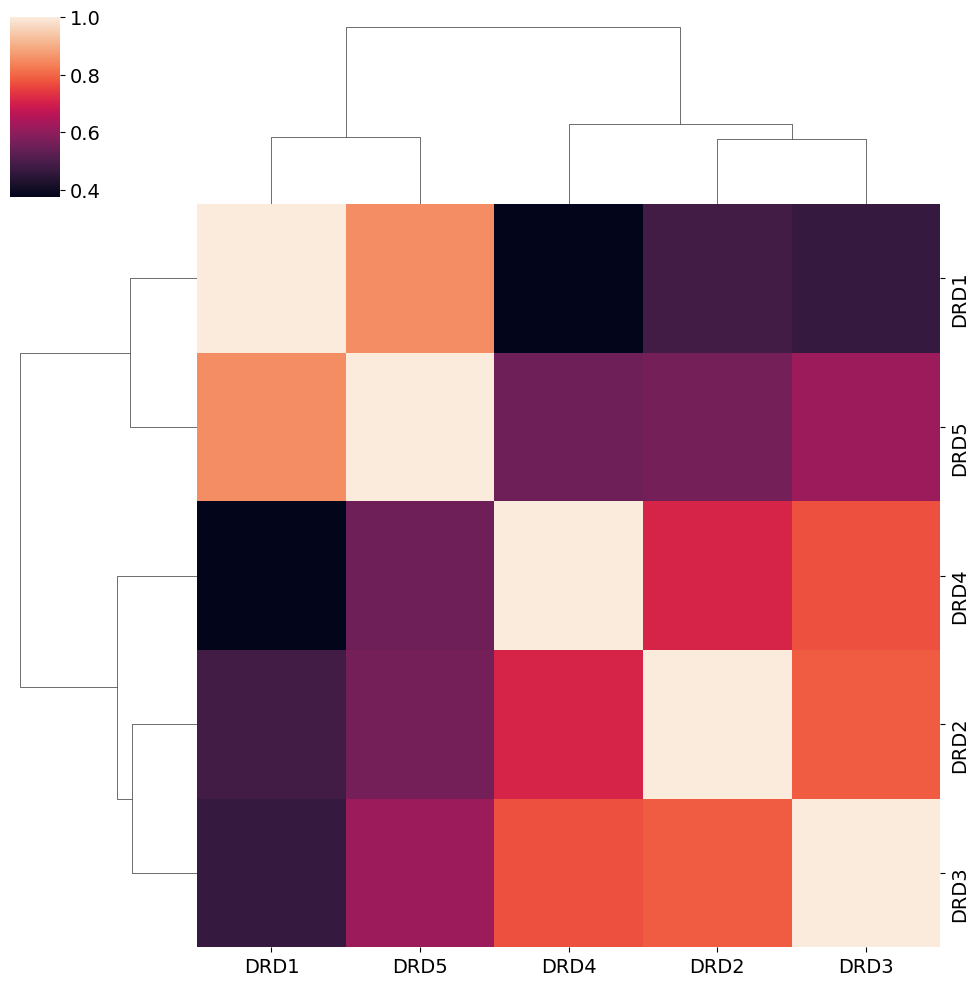

In [76]:
sns.clustermap(cormat_drd, yticklabels=["DRD1", "DRD2", "DRD3", "DRD4", "DRD5"], xticklabels=["DRD1", "DRD2", "DRD3", "DRD4", "DRD5"])